In [10]:
import ipynb
import geopandas as gpd
import shapely.geometry as geom
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
# import feature cube generator
from ipynb.fs.defs.featurecube import build_feature_cube

In [3]:
mine_id = 1
mine = gpd.read_file("content/mines/mines_cils.shp")
mine_sel = mine.iloc[[mine_id]]   # select one mine

if mine_sel.crs is None or mine_sel.crs.to_epsg() != 4326:
    mine_sel = mine_sel.to_crs(epsg=4326)

geom_sel = mine_sel.geometry.iloc[0]

AOI = mapping(geom_sel)


In [4]:
BASE_DATA_DIR = "content/mine01/baseline"

In [5]:
baseline_cube = build_feature_cube(BASE_DATA_DIR, AOI)

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as 

In [6]:
baseline_stats = xr.Dataset({
    "ndvi_median": baseline_cube["NDVI"].median("time"),
    "ndvi_var": baseline_cube["NDVI"].var("time"),
    "bsi_median": baseline_cube["BSI"].median("time"),
    "swir1_median": baseline_cube["B11"].median("time"),
    "swir2_median": baseline_cube["B12"].median("time"),
})


In [7]:
NDVI_BARE_MAX = 0.25      # vegetation cannot be excavation above this
NDVI_VAR_MAX  = 0.02      # excavation is spectrally stable
BSI_MIN       = 0.0       # bare soil indicator


In [8]:
baseline_mining_mask = (
    (baseline_stats["ndvi_median"] < NDVI_BARE_MAX) &
    (baseline_stats["ndvi_var"] < NDVI_VAR_MAX) &
    (baseline_stats["bsi_median"] > BSI_MIN)
).astype(int)


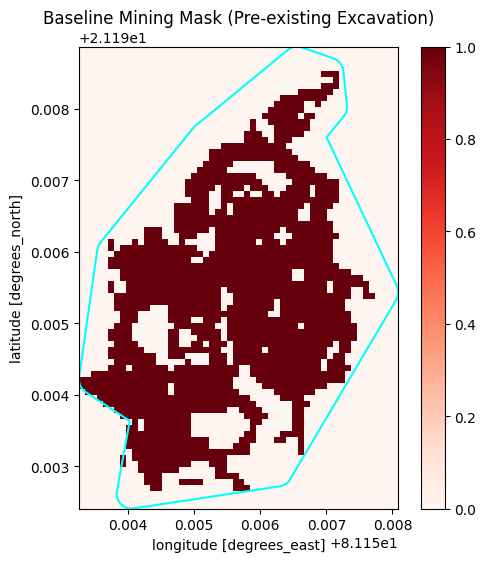

In [9]:
plt.figure(figsize=(6,6))
baseline_mining_mask.plot(cmap="Reds")
mine.boundary.plot(ax=plt.gca(), color="cyan")
plt.title("Baseline Mining Mask (Pre-existing Excavation)")
plt.show()
